# Determinant QMC data visualization

## Are you testing or making plots?

In [6]:
SAVEPLOTS = False

## Load simulation data

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

NSITES = 384
dt = 0.0625
beta = 4.
L = 64
t = 1.
U = 8.
mu = 3.5
totalMCSweeps = 512
freq = 4
intsize = 16
geom = 15
ny = 8

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

# Load weights to plot

weights = np.loadtxt(simDir + '/Log-weights.csv')

WL = weights.size

latSweeps = np.arange(WL) + 1

# Metropolis Sampling convergence

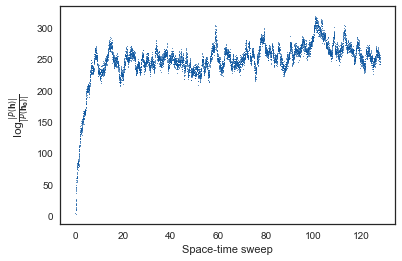

In [3]:
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights.png', dpi = 600)

# Spin-spin correlations $\left\langle S_{i}^\alpha S_{j}^\beta \right\rangle$

In [4]:
SiaSjb = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv')

## Squared magnetization as a funtion of the transverse coordinate $\left\langle m^2 \right\rangle (y)$

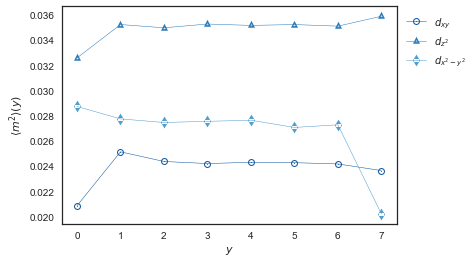

In [7]:
mSq = np.diag(SiaSjb)
nOrb = 3
nx = int(NSITES / nOrb / ny)

mSqdz2 = np.zeros(ny)
mSqdxy = np.zeros(ny)
mSqdx2y2 = np.zeros(ny)

for y in range(ny):
    for x1 in range(nx):
        for x2 in range(nx):
            mSqdz2[y] += SiaSjb[3 * (nx * y + x1), 3 * (nx * y + x2)]
            mSqdxy[y] += SiaSjb[3 * (nx * y + x1) + 1, 3 * (nx * y + x2) + 1]
            mSqdx2y2[y] += SiaSjb[3 * (nx * y + x1) + 2, 3 * (nx * y + x2) + 2]

plt.plot(mSqdxy/(nx**2), marker = 'o', markeredgewidth = 6, markersize = 1, label = r'$d_{xy}$', linewidth = 0.5)
plt.plot(mSqdz2/(nx**2), marker = '^', markeredgewidth = 4, markersize = 0.5, label = r'$d_{z^2}$', linewidth = 0.5)
plt.plot(mSqdx2y2/(nx**2), marker = 'd', markeredgewidth = 6, markersize = 0.1, label = r'$d_{x^2-y^2}$', linewidth = 0.5)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel(r'$y$')
plt.ylabel(r'$\left\langle m^2 \right\rangle (y)$')

if SAVEPLOTS == True:
    plt.savefig(plotDir + "mSqOrbitalResolved.png", dpi = 600)

In [8]:
mSqLat = np.zeros((nx, ny))

for y in range(ny):
    for x in range(nx):
        mSqLat[x, y] = mSq[3 * (nx * y + x) + 2]

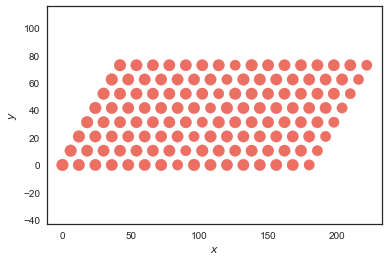

In [9]:
plt.figure(1, figsize = (5,5))
clr = np.chararray((3 * nx * ny), itemsize = 10)

dist = 12

vs = np.zeros((nx * ny , 2))
v1 = dist * np.array([1, 0])
v2 = dist * np.array([1 / 2, np.sqrt(3) / 2])
a1 = np.arange(nx)
a2 = np.arange(ny)                
    
for i in range(nx):
    for j in range(ny):
        vs[nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 
        if mSqLat[i, j] > 0:
            clr[nx * j + i] = "#e74c3c"
        else:
            clr[nx * j + i] = "#95a5a6"
            
dotscale = 300

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(mSqLat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig(plotDir + '/mSq.png', dpi = 600)

# Orbital-projected correlations

In [10]:
SiSjdz2 = np.zeros((nx*ny, nx*ny))
SiSjdxy = np.zeros((nx*ny, nx*ny))
SiSjdx2y2 = np.zeros((nx*ny, nx*ny))

In [11]:
for i in range(int(NSITES / nOrb)):
    for j in range(int(NSITES / nOrb)):
        SiSjdz2[i, j] = SiaSjb[3 * i, 3 * j]
        SiSjdxy[i, j] = SiaSjb[3 * i + 1, 3 * j + 1]
        SiSjdx2y2[i, j] = SiaSjb[3 * i + 2, 3 * j + 2]

In [33]:
flatCorrsdz2 = np.zeros((nx, ny))
flatCorrsdxy = np.zeros((nx, ny))
flatCorrsdx2y2 = np.zeros((nx, ny))

for x in range(nx):
    for y in range(ny):
        flatCorrsdz2[x, y] = SiSjdz2[12, nx*y + x]
        flatCorrsdxy[x, y] = SiSjdxy[12, nx*y + x]
        flatCorrsdx2y2[x, y] = SiSjdx2y2[12, nx*y + x]

print("Correlations by distance:\n", flatCorrsdz2)
print("Correlations by distance:\n", flatCorrsdxy)
print("Correlations by distance:\n", flatCorrsdx2y2)

Correlations by distance:
 [[  1.40477961e-03  -4.52370341e-04  -1.78147932e-03   3.24412904e-03
    6.57826668e-04  -5.46522366e-04   1.48537281e-03  -2.20810095e-03]
 [ -5.32639280e-03   1.05610759e-03   2.12047085e-03   1.60061193e-03
    4.70278227e-03   2.70857354e-04  -1.32430475e-03  -7.12590935e-04]
 [  3.33060275e-03   1.78619571e-03  -2.79007818e-04   2.90099650e-03
    8.97126896e-04  -2.53720701e-03   6.57607271e-03   2.08427971e-03]
 [ -3.78576765e-03  -2.11829634e-03   9.52120603e-04  -2.61704655e-03
    1.92224178e-03  -5.00440257e-04   1.64692667e-03  -2.36473046e-03]
 [  1.66548374e-04   9.25506798e-04  -2.85170289e-03   4.45216974e-03
    1.98627235e-04   1.31117850e-04  -2.70389240e-03   3.56387297e-05]
 [ -1.55439286e-03   1.04551924e-03  -3.34721275e-03  -1.82611197e-03
   -2.27267550e-04  -3.46030729e-04   5.26272083e-03   9.51487129e-04]
 [  3.61143156e-03  -3.20098444e-03  -7.54403936e-05   1.38626988e-04
    1.36205513e-03   2.83451943e-03   2.43073332e-03   1.

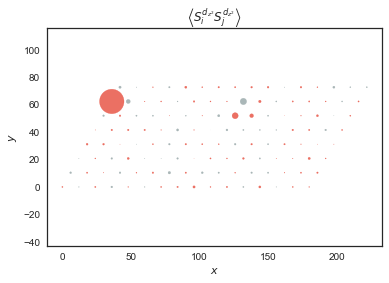

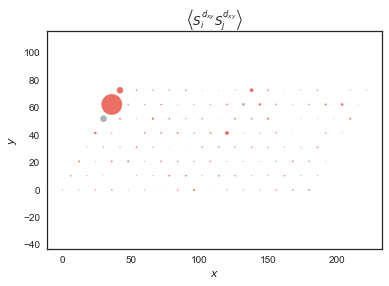

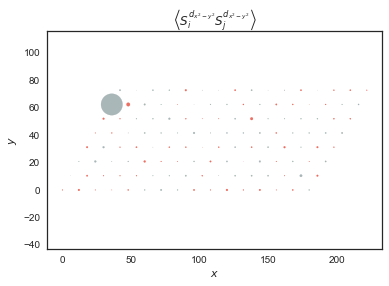

In [34]:
plt.figure(1, figsize = (5,5))
clrdz2 = np.chararray((nx * ny), itemsize = 10)
clrdxy = np.chararray((nx * ny), itemsize = 10)
clrdx2y2 = np.chararray((nx * ny), itemsize = 10)

dist = 12

vs = np.zeros((nx * ny , 2))
v1 = dist * np.array([1, 0])
v2 = dist * np.array([1 / 2, np.sqrt(3) / 2])
a1 = np.arange(nx)
a2 = np.arange(ny)                
    
for i in range(nx):
    for j in range(ny):
        vs[nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 
        if flatCorrsdz2[i, j] > 0:
            clrdz2[nx * j + i] = "#e74c3c"
        else:
            clrdz2[nx * j + i] = "#95a5a6"
        if flatCorrsdxy[i, j] > 0:
            clrdxy[nx * j + i] = "#e74c3c"
        else:
            clrdxy[nx * j + i] = "#95a5a6"
        if flatCorrsdx2y2[i, j] > 0:
            clrdx2y2[nx * j + i] = "#e74c3c"
        else:
            clrdx2y2[nx * j + i] = "#95a5a6"

dotscale = 1000

fig1, ax1 = plt.subplots()

plt.title(r'$\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{z^2}} \right\rangle$')
ax1.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(flatCorrsdz2),\
           c = clrdz2.decode('UTF-8'), alpha = 0.8, edgecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig(plotDir + '/CorrelationsDotsdz2.png', dpi = 600)

fig2, ax2 = plt.subplots()
plt.title(r'$\left\langle S_{i}^{d_{xy}} S_{j}^{d_{xy}} \right\rangle$')
ax2.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(flatCorrsdxy),\
           c = clrdxy.decode('UTF-8'), alpha = 0.8, edgecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig(plotDir + '/CorrelationsDotsdxy.png', dpi = 600)

fig3, ax3 = plt.subplots()

plt.title(r'$\left\langle S_{i}^{d_{x^2 - y^2}} S_{j}^{d_{x^2 - y^2}} \right\rangle$')
ax3.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(flatCorrsdx2y2),\
           c = clrdx2y2.decode('UTF-8'), alpha = 0.8, edgecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig(plotDir + '/CorrelationsDotsdx2y2.png', dpi = 600)


In [14]:
n_qsX = nx
n_qsY = ny
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/n_qsX, qMax/n_qsX)
qsY = np.arange(0, qMax + qMax/n_qsY, qMax/n_qsY)
Sdz2 = np.zeros((n_qsX+1, n_qsY+1))
Sdxy = np.zeros((n_qsX+1, n_qsY+1))
Sdx2y2 = np.zeros((n_qsX+1, n_qsY+1))
dist = 0

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x1 in range(nx):
            for y1 in range(ny):
                for x2 in range(nx):
                    for y2 in range(ny):
                        Sdz2[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                   np.sqrt(3)/2*(y1-y2) *qy ) * SiSjdz2[nx * y1 + x1, nx*y2 + x2]
                        Sdxy[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                   np.sqrt(3)/2*(y1-y2) *qy ) * SiSjdxy[nx * y1 + x1, nx*y2 + x2]
                        Sdx2y2[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                     np.sqrt(3)/2*(y1-y2) *qy ) * SiSjdx2y2[nx * y1 + x1, nx*y2 + x2]

Sdz2 /=  (NSITES / nOrb)
Sdxy /=  (NSITES / nOrb)
Sdx2y2 /=  (NSITES / nOrb)

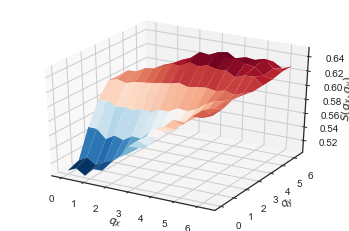

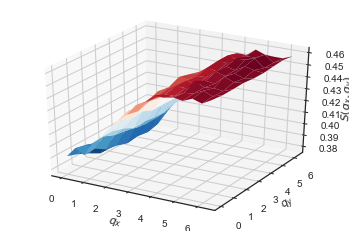

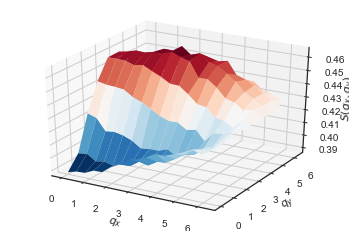

In [15]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, Sdz2.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dz2.png', dpi = 600)

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, Sdxy.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dxy.png', dpi = 600)

fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, Sdx2y2.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dx2y2.png', dpi = 600)

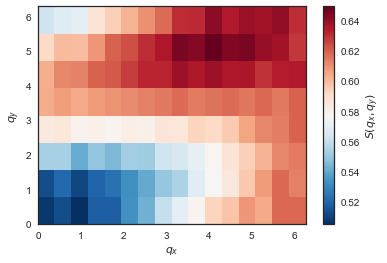

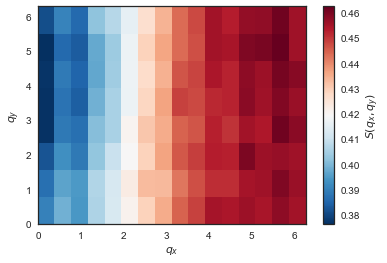

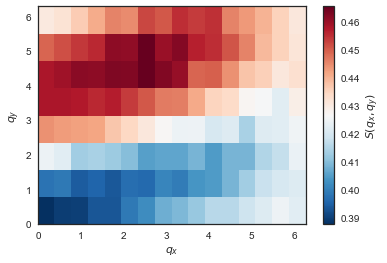

In [16]:
fig1, ax1 = plt.subplots()

p = ax1.pcolor(qsX, qsY, Sdz2.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig1.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dz2_pcolor.png', dpi = 600)

fig2, ax2 = plt.subplots()

p = ax2.pcolor(qsX, qsY, Sdxy.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig2.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dxy_pcolor.png', dpi = 600)

fig3, ax3 = plt.subplots()

p = ax3.pcolor(qsX, qsY, Sdx2y2.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig3.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dx2y2_pcolor.png', dpi = 600)

# Spin-spin correlations (summing over orbitals)

$\left\langle S_i S_j \right\rangle = \sum_{\alpha \beta} \left\langle S_i^\alpha S_j^\beta \right\rangle$

In [17]:
SiSj = np.zeros((nx*ny, nx*ny))

In [18]:
for i in range(nx*ny):
    for j in range(nx*ny):
        SiSj[i, j] = SiaSjb[nOrb * i, nOrb * j] + SiaSjb[nOrb * i + 1, nOrb * j] + SiaSjb[nOrb * i + 2, nOrb * j] + \
        SiaSjb[nOrb * i, nOrb * j + 1] + SiaSjb[nOrb * i + 1, nOrb * j + 1] + SiaSjb[nOrb * i + 2, nOrb * j + 1] + \
        SiaSjb[nOrb * i, nOrb * j + 2] + SiaSjb[nOrb * i + 1, nOrb * j + 2] + SiaSjb[nOrb * i + 2, nOrb * j + 2]

In [19]:
SiSj

array([[  1.48343271e+00,  -3.76453420e-01,  -2.83055583e-02, ...,
          9.27690774e-04,  -6.57987541e-03,  -7.98279225e-04],
       [ -3.76453420e-01,   1.47617481e+00,  -3.84337486e-01, ...,
          1.87166847e-03,   1.19419300e-03,  -7.54531804e-04],
       [ -2.83055583e-02,  -3.84337486e-01,   1.48627654e+00, ...,
          3.35684367e-03,  -4.34187145e-03,  -9.55636615e-04],
       ..., 
       [  9.27690774e-04,   1.87166847e-03,   3.35684367e-03, ...,
          1.39852096e+00,  -3.28054706e-01,  -5.31801769e-02],
       [ -6.57987541e-03,   1.19419300e-03,  -4.34187145e-03, ...,
         -3.28054706e-01,   1.38828660e+00,  -3.41900515e-01],
       [ -7.98279225e-04,  -7.54531804e-04,  -9.55636615e-04, ...,
         -5.31801769e-02,  -3.41900515e-01,   1.40544998e+00]])

In [20]:
flatCorrs = np.zeros((nx, ny))

for x in range(nx):
    for y in range(ny):
        flatCorrs[x, y] = SiSj[0, nx*y + x]

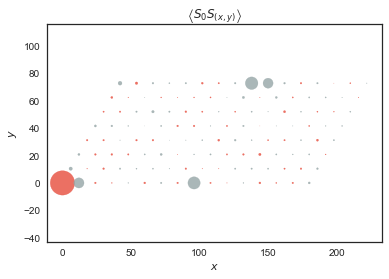

In [21]:
plt.figure(1, figsize = (5,5))
clr = np.chararray((nx * ny), itemsize = 10)
dist = 12

vs = np.zeros((nx * ny , 2))
v1 = dist * np.array([1, 0])
v2 = dist * np.array([1 / 2, np.sqrt(3) / 2])
                
for i in range(nx):
    for j in range(ny):
        vs[nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 
        if flatCorrs[i, j] > 0:
            clr[nx * j + i] = "#e74c3c"
        else:
            clr[nx * j + i] = "#95a5a6"

dotscale = 400

fig1, ax1 = plt.subplots()

plt.title(r'$\left\langle S_0 S_{(x, y)} \right\rangle$')
ax1.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(flatCorrs),\
           c = clrdz2.decode('UTF-8'), alpha = 0.8, edgecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig(plotDir + '/CorrelationsDots.png', dpi = 600)


In [22]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/nx, qMax/nx)
qsY = np.arange(0, qMax + qMax/ny, qMax/ny)
S = np.zeros((nx+1, ny+1))
dist = 0

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x1 in range(nx):
            for y1 in range(ny):
                for x2 in range(nx):
                    for y2 in range(ny):
                        S[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                np.sqrt(3) / 2 * (y1-y2) *qy ) * SiSj[nx * y1 + x1, nx*y2 + x2]

S /=  (NSITES / nOrb)

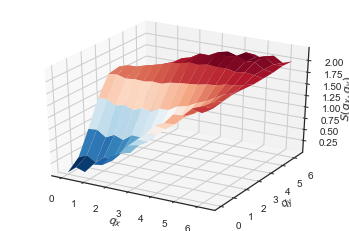

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, S.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q).png', dpi = 600)

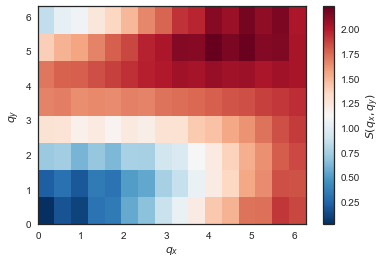

In [24]:
fig, ax = plt.subplots()

p = ax.pcolor(qsX, qsY, S.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)pcolor.png', dpi = 600)

In [25]:
maxInds = np.unravel_index(np.argmax(S), (nx+1, ny+1))

print("Maximum of S(q): ")
print('qx', qsX[maxInds[0]])
print('qy', qsY[maxInds[1]])

Maximum of S(q): 
qx 3.92699081699
qy 4.71238898038


## A comparison that could be useful

By the definition of the ZZ magnetic susceptibility

$\chi(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf R_i - \mathbf R_j)} \int_0^\beta \left\langle \mathbf S_{\mathbf i}(\tau) \cdot \mathbf S_{\mathbf j}(0) \right\rangle d\tau $

we obtain an important identity

$\chi ( 0 ) = \beta S ( 0 ) ,$

which we used to check whether our results are consistent.

Unequal-time measurements are more prone to fluctuations and thus there are minor variations due to higher variance of the corresponding estimators.

In [26]:
print("beta S (0): ", S[0, 0] * beta)

beta S (0):  0.103556587537


# Now the same just for one edge

2.4534736620136641

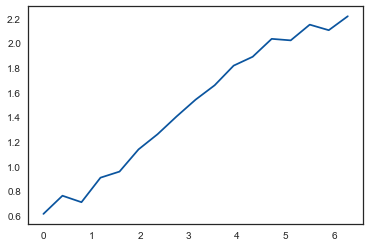

In [27]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/nx, qMax/nx)
S = np.zeros((nx+1))

for idxX, qx in enumerate(qsX):
    for x1 in range(nx):
        for x2 in range(nx):
            S[idxX] += np.cos(0.5*(x1 - x2) * qx) * SiSj[x1,x2]

S /=nx

plt.plot(qsX, S)
S[0] * beta

2.3919092378705518

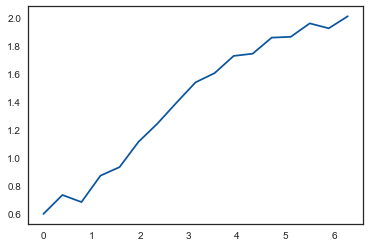

In [28]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/nx, qMax/nx)
S = np.zeros((nx+1))

for idxX, qx in enumerate(qsX):
    for x1 in range(nx):
        for x2 in range(nx):
            S[idxX] += np.cos(0.5*(x1 - x2) * qx) * SiSj[nx*(ny - 1 ) + x1, nx*(ny - 1 ) + x2]

S /=nx

plt.plot(qsX, S)
S[0] * beta